# Simulated Annealing

In [1]:
from array import array
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm
from scipy.optimize import curve_fit
import scipy.integrate as spi
import numpy as np
import math
from PlotFunctions import read, PsiNum, PlotHist, PlotEnergies
       
N = 20000                 
x = np.arange(N) + 1

Our aim in this notebook will be to show the optimization of the parameters of the trial wavefunction

$$
\psi_T^{\sigma,\mu}(x) = N ( e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}} )
$$

for a particle that moves in a one dimensional double-well potential

## Optimization

We begin by showing how the energy behaves as a function of $\beta$.
We chose to start at $\beta = 1$ and increment its value after every annealing cycle by $d\beta = 1.5$
The starting values for the parameters are

$\mu = 0.1$ (just to be sure the result turns out positive, even though it's irrelevant in the end)\
$\sigma = 1$

Here $200$ annealing cycles composed by $10$ steps each are performed

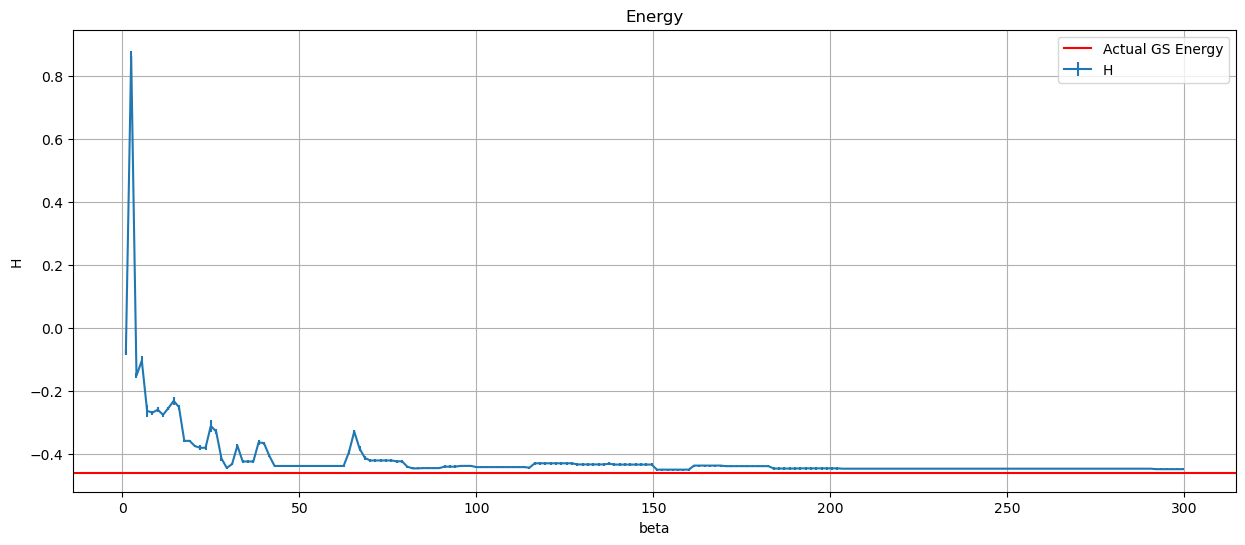

In [2]:
PlotEnergies()

### Results

It is clear from the graph that the ground state energy reaches its lowest value about when $\beta = 200$, that is around the $130th$ step of the annealing schedule.

After the annealing, an additional run is done with the final temperature, in order to gain some statistics on the final parameters: $2500$ steps are done, each of which produces a value for the parameter pair. After blocking them and computing the statistical uncertainties, these are the results

In [3]:
mu = np.genfromtxt('INPUT/InitialParameters.dat')[0]
sigma = np.genfromtxt('INPUT/InitialParameters.dat')[1]
print("Mu: ", mu[0], "+/-", mu[1])
print("Sigma ", sigma[0], "+/-", sigma[1])

Mu:  0.800596 +/- 0.00525035
Sigma  0.627199 +/- 0.00111189


## Results for the optimized parameters

We go on now to evaluate some quantities with the parameters we have just found. First of all, an estimate for the ground state energy

### Energy

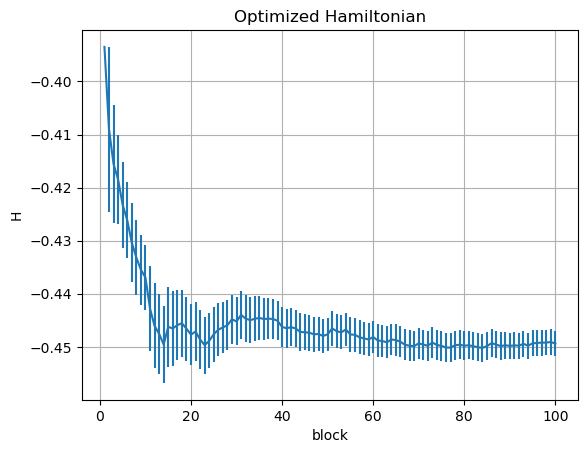

In [4]:
res = read('OUTPUT/Hamiltonian.dat')
x = np.arange(len(res[0])) + 1
plt.errorbar(x, res[0], yerr=res[1])
plt.xlabel('block')
plt.ylabel('H')
plt.grid()
plt.title('Optimized Hamiltonian')
plt.show()

In [5]:
print("GS Energy: ", res[0][-1])
print("Error: ", res[1][-1])

GS Energy:  -0.449401
Error:  0.00237927


### Wavefunction

We move on to look into the wavefunction by showing a histogram for the sampled positions during the evaluation of the energy

In [6]:
def PsiTrial(x):
    return (np.exp((-.5*(x-mu[0])**2)/sigma[0]**2) + np.exp((-.5*(x+mu[0])**2)/sigma[0]**2))**2

In [7]:
a = 10
N = 1000 
norm, _ = spi.quad(PsiTrial, -a, a)
x = np.linspace(-a/2, a/2, N)
y = PsiTrial(x) / norm

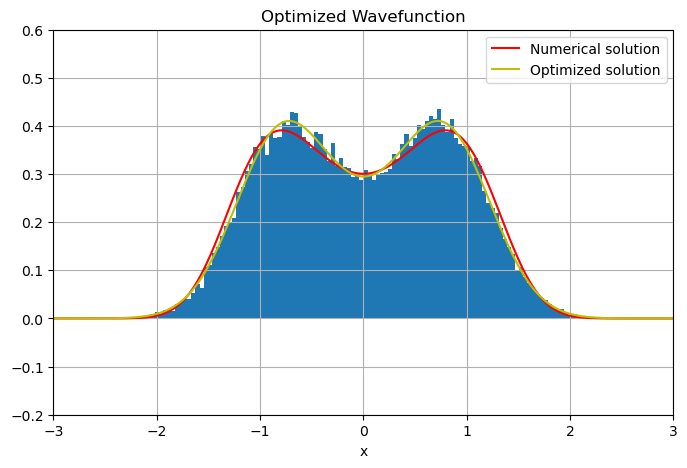

In [8]:
plt.figure(figsize=(8,5))
plt.plot(x, PsiNum(x), color='r', label="Numerical solution")
plt.xlabel("x")
plt.xlim((-3,3))
plt.ylim((-0.2,0.6))
plt.grid()
PlotHist()
plt.plot(x,y, color='y', label="Optimized solution")
plt.legend()
plt.show()